### Completeness Test

Injecting simulated sources with different flux densities at random positions of dirty map in order to study the completeness of selection methods as a function of S/N.

**Oteo et al.**
1. make a range of flux densities (flat distribution), 0.1 to 10mJy, step 0.025mJy
2. inject a source at random position within 1.5 PB
3. change the phasecenter to that position -> object at the center of dirty map -> easy to define same cleaning box for all injected source.
4. do non-interactive cleaning, down to the rms of dirty map
5. repeat from step 2. for 100x for each flux (with different position in the map)
6. repeat for different flux

Note: not using PB correction, same like in the source detection

<hr>
<hr>

Question:
- Completeness test should be different for different image, right?
- Changing it to the center, means that it is different with real condition when extracting the source, right? i.e. the sources are not in the phase center


<hr>
<hr>

**Our method**
1. make a range of flux depend on the RMS of image e.g. 2.5$\sigma$ to 10$\sigma$; _Oteo result: 100% complete at 7$\sigma$_
2. make a grid based on beam size (this define minimum distance between source/grid size/maximum number of source) and also define minimum number of source that we need
3. inject the samples for a value of flux in the grid
4. because it is grid then we can define a cleaning box based on position that we have. Then we can CLEAN all sample for a single value of flux all together (not one by one 100x like in Oteo et al?) -> the phase center is not 'on' the sample-source -> more similar with real case
5. repeat from step 3. for different value of flux

with this method we can evaluate completeness test **not only as the function of flux or S/N**, but also as a **function of radius** from the center -> function of primary beam attenuation 

### Estimation

On band 6 with PB ~24" and beam size 0.2"

In [1]:
import numpy as np

# example on Band 6
PB = 24.0 # arcsec
beam = 0.2 # arcsec

imagesize = 2*PB
distance_between_source = 10*beam # 10 x beam -> change this value to fine appropriate number

grid = imagesize/(distance_between_source)
number = (grid)**2
print grid, number
grid = int(grid)
print "Grid size : ", grid, "x", grid, "\nTotal number of sample: ", int(number)

24.0 576.0
Grid size :  24 x 24 
Total number of sample:  576


### Generate sample

In [2]:
center = [65.8158364, -1.3425182]
start  = [center[0] - imagesize/(2*3600) + 0.5*distance_between_source/3600.0, 
         center[1] - imagesize/(2*3600) + 0.5*distance_between_source/3600.0]

sample = []
for i in range(grid):
    for j in range(grid):
        sample.append([start[0] + distance_between_source/3600. * i, start[1] + distance_between_source/3600. * j]) 
        # in degree

sample = np.array(sample)

### Try overplot

In [3]:
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


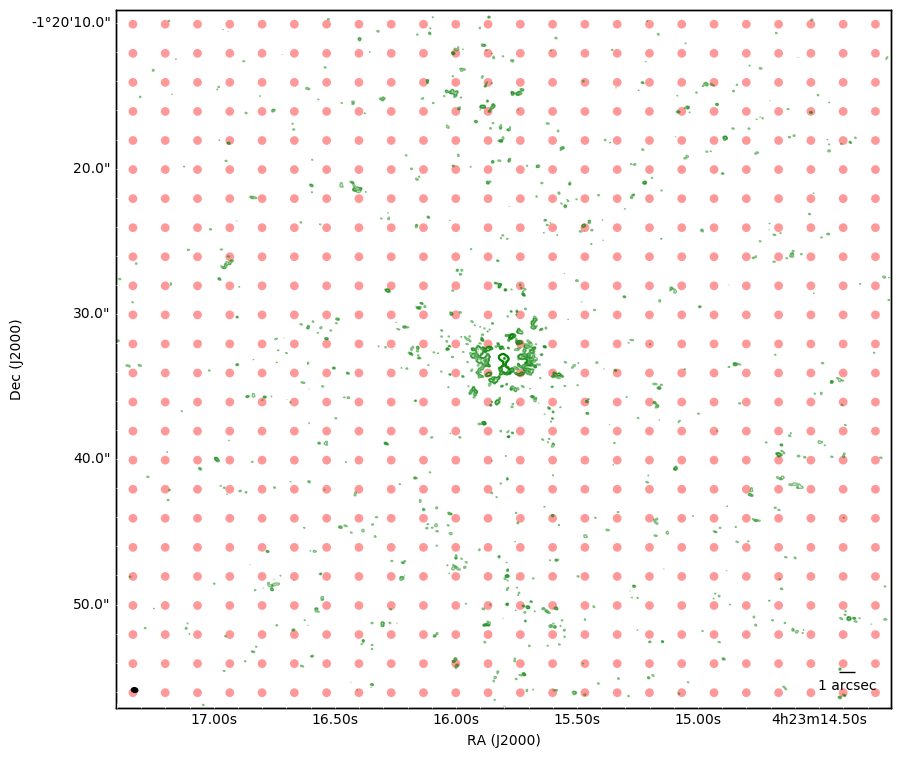

In [5]:
B6 = '../compareImage/images/J0423-0120_B6.fits'
rmsB6 = 3.4E-05

multp = np.array([2.5, 3, 3.5, 4.5, 5, 5.5, 6, 10, 100, 1000, 10000]) # sigma
lvlB6 = rmsB6*multp

fig = aplpy.FITSFigure(B6);
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")
fig.show_contour(B6, colors='green', levels=lvlB6, alpha=0.5);

## add marker for the position of fake source
fig.show_markers(sample[:,0], sample[:,1], edgecolor='none', facecolor='red', marker='o', s=40, alpha=0.4);

### After making sure that the generated sample is in correct position, lets try it in real image in CASA

<hr>
<hr>

Before that, question:

+ How to justify the injected-source that located in same position with the candidate-source in image? it will influence the completeness test it self, doesn't it?
+ Should we use shape = 'Gaussian' or 'Point'? If gaussian, what kind of shape we use, synthesized beam? With or without spectral index? 
+ If it is point source without spectral index, we don't need to set the 'freq', right?
+ In the CLEANing after injecting, should we 'mask' every location of injected-source? Oteo et al, make a box-mask in cleaning after changing phasecenter to each injected-source.
-- if needed we can use https://casa.nrao.edu/docs/TaskRef/makemask-task.html or define it in mask parameter in CLEAN task 
+ we extract the source using SExtractor again, what 'flux' we can use to compare with our injected flux-value. Is it FLUX_BEST? In Oteo et al., they explain about Flux Boosting (comparison between injected and recovered flux), but they don't explain what 'flux' they used.  [*actually we can see later after trying :)] 

<hr>
<hr>